In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

D F G E B A

In [2]:
df0 = pd.read_excel('2012.xls')

In [3]:
df0.head()

,BBL,Street Number,Street Name,Borough,Zip,Benchmarking Submission,Entry Number,Site EUI,Weather Normalized Source EUI,Water per Square Foot,ENERGY STAR Score,GHG,Reported Building Square Footage,Reported Facility Type,Number of Buildings,Reported BINs
0,1000050010,115,BROAD STREET,MANHATTAN,10004,No DOF Record as of 08/01/12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000090001,34,WHITEHALL STREET,MANHATTAN,10004,Yes,1518.0,157.9,437.4,NaN,27.0,12077.53,852840.0,Office,1.0,1000018
2,1000090014,17,STATE STREET,MANHATTAN,10004,Yes,312.0,91.5,278.7,NaN,61.0,4817.62,574105.0,Office,1.0,1000020
3,1000090029,24,WHITEHALL STREET,MANHATTAN,10004,Yes,52.0,137.2,306.6,6.66,41.0,10190.38,859807.0,Office,1.0,1000021
4,1000100014,33,WHITEHALL STREET,MANHATTAN,10004,No DOF Record as of 08/01/12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df0.shape

(4081, 16)

In [5]:
df = df0[['BBL', 'Street Number', 'Borough', 'Zip', 'Benchmarking Submission', 'Entry Number','Weather Normalized Source EUI','GHG','ENERGY STAR Score']]

In [6]:
df

,BBL,Street Number,Borough,Zip,Benchmarking Submission,Entry Number,Weather Normalized Source EUI,GHG,ENERGY STAR Score
0,1000050010,115,MANHATTAN,10004,No DOF Record as of 08/01/12,NaN,NaN,NaN,NaN
1,1000090001,34,MANHATTAN,10004,Yes,1518.0,437.4,12077.53,27.0
2,1000090014,17,MANHATTAN,10004,Yes,312.0,278.7,4817.62,61.0
3,1000090029,24,MANHATTAN,10004,Yes,52.0,306.6,10190.38,41.0
4,1000100014,33,MANHATTAN,10004,No DOF Record as of 08/01/12,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4076,5075770003,200,STATEN ISLAND,10309,Yes,1949.0,146.6,283.17,11.0
4077,5077020001,6420,STATEN ISLAND,10309,No DOF Record as of 08/01/12,NaN,NaN,NaN,NaN
4078,5079710250,236,STATEN ISLAND,10309,No DOF Record as of 08/01/12,NaN,NaN,NaN,NaN
4079,5079910100,99,STATEN ISLAND,10307,Yes,2027.0,93.5,160.15,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4081 entries, 0 to 4080
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   BBL                            4081 non-null   int64  
 1   Street Number                  4033 non-null   object 
 2   Borough                        4081 non-null   object 
 3   Zip                            4081 non-null   int64  
 4   Benchmarking Submission        4081 non-null   object 
 5   Entry Number                   2546 non-null   float64
 6   Weather Normalized Source EUI  2319 non-null   float64
 7   GHG                            2309 non-null   float64
 8   ENERGY STAR Score              1593 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 287.1+ KB


# Удаление плохих строк в датафрейме

In [8]:
df = df.dropna(subset=['ENERGY STAR Score'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1593 entries, 1 to 4076
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   BBL                            1593 non-null   int64  
 1   Street Number                  1592 non-null   object 
 2   Borough                        1593 non-null   object 
 3   Zip                            1593 non-null   int64  
 4   Benchmarking Submission        1593 non-null   object 
 5   Entry Number                   1593 non-null   float64
 6   Weather Normalized Source EUI  1518 non-null   float64
 7   GHG                            1515 non-null   float64
 8   ENERGY STAR Score              1593 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 124.5+ KB


In [9]:
df.isnull().sum()

BBL                               0
Street Number                     1
Borough                           0
Zip                               0
Benchmarking Submission           0
Entry Number                      0
Weather Normalized Source EUI    75
GHG                              78
ENERGY STAR Score                 0
dtype: int64

In [10]:
df['Borough'].nunique()

5

In [11]:
df['Borough'].value_counts()

MANHATTAN        1068
QUEENS            192
BROOKLYN          182
BRONX             105
STATEN ISLAND      46
Name: Borough, dtype: int64

In [12]:
df["Street Number"] = pd.to_numeric(df['Street Number'], downcast='integer', errors='coerce')

<ipython-input-12-e9dc041e5f76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Street Number"] = pd.to_numeric(df['Street Number'], downcast='integer', errors='coerce')


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1593 entries, 1 to 4076
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   BBL                            1593 non-null   int64  
 1   Street Number                  1400 non-null   float64
 2   Borough                        1593 non-null   object 
 3   Zip                            1593 non-null   int64  
 4   Benchmarking Submission        1593 non-null   object 
 5   Entry Number                   1593 non-null   float64
 6   Weather Normalized Source EUI  1518 non-null   float64
 7   GHG                            1515 non-null   float64
 8   ENERGY STAR Score              1593 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 124.5+ KB


In [14]:
df['Benchmarking Submission'].value_counts()

Yes    1593
Name: Benchmarking Submission, dtype: int64

In [15]:
df = df.drop(['Benchmarking Submission'], axis=1)

In [16]:
df = df.drop(['BBL'], axis=1)

In [17]:
df = df.drop(['Street Number'], axis = 1)

In [18]:
# Кодируем One-hot coding
ohc_borough = pd.get_dummies(df['Borough'])

In [20]:
df.isnull().sum()

Borough                           0
Zip                               0
Entry Number                      0
Weather Normalized Source EUI    75
GHG                              78
ENERGY STAR Score                 0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1593 entries, 1 to 4076
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Borough                        1593 non-null   object 
 1   Zip                            1593 non-null   int64  
 2   Entry Number                   1593 non-null   float64
 3   Weather Normalized Source EUI  1518 non-null   float64
 4   GHG                            1515 non-null   float64
 5   ENERGY STAR Score              1593 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 87.1+ KB


In [22]:
df['Weather Normalized Source EUI'] = df['Weather Normalized Source EUI'].fillna(df['Weather Normalized Source EUI'].mean())
df['GHG'] = df['GHG'].fillna(df['GHG'].mean())

In [23]:
df.isnull().sum()

Borough                          0
Zip                              0
Entry Number                     0
Weather Normalized Source EUI    0
GHG                              0
ENERGY STAR Score                0
dtype: int64

array([[<AxesSubplot:xlabel='Zip', ylabel='Zip'>,
        <AxesSubplot:xlabel='Entry Number', ylabel='Zip'>,
        <AxesSubplot:xlabel='Weather Normalized Source EUI', ylabel='Zip'>,
        <AxesSubplot:xlabel='GHG', ylabel='Zip'>,
        <AxesSubplot:xlabel='ENERGY STAR Score', ylabel='Zip'>],
       [<AxesSubplot:xlabel='Zip', ylabel='Entry Number'>,
        <AxesSubplot:xlabel='Entry Number', ylabel='Entry Number'>,
        <AxesSubplot:xlabel='Weather Normalized Source EUI', ylabel='Entry Number'>,
        <AxesSubplot:xlabel='GHG', ylabel='Entry Number'>,
        <AxesSubplot:xlabel='ENERGY STAR Score', ylabel='Entry Number'>],
       [<AxesSubplot:xlabel='Zip', ylabel='Weather Normalized Source EUI'>,
        <AxesSubplot:xlabel='Entry Number', ylabel='Weather Normalized Source EUI'>,
        <AxesSubplot:xlabel='Weather Normalized Source EUI', ylabel='Weather Normalized Source EUI'>,
        <AxesSubplot:xlabel='GHG', ylabel='Weather Normalized Source EUI'>,
        <AxesSub

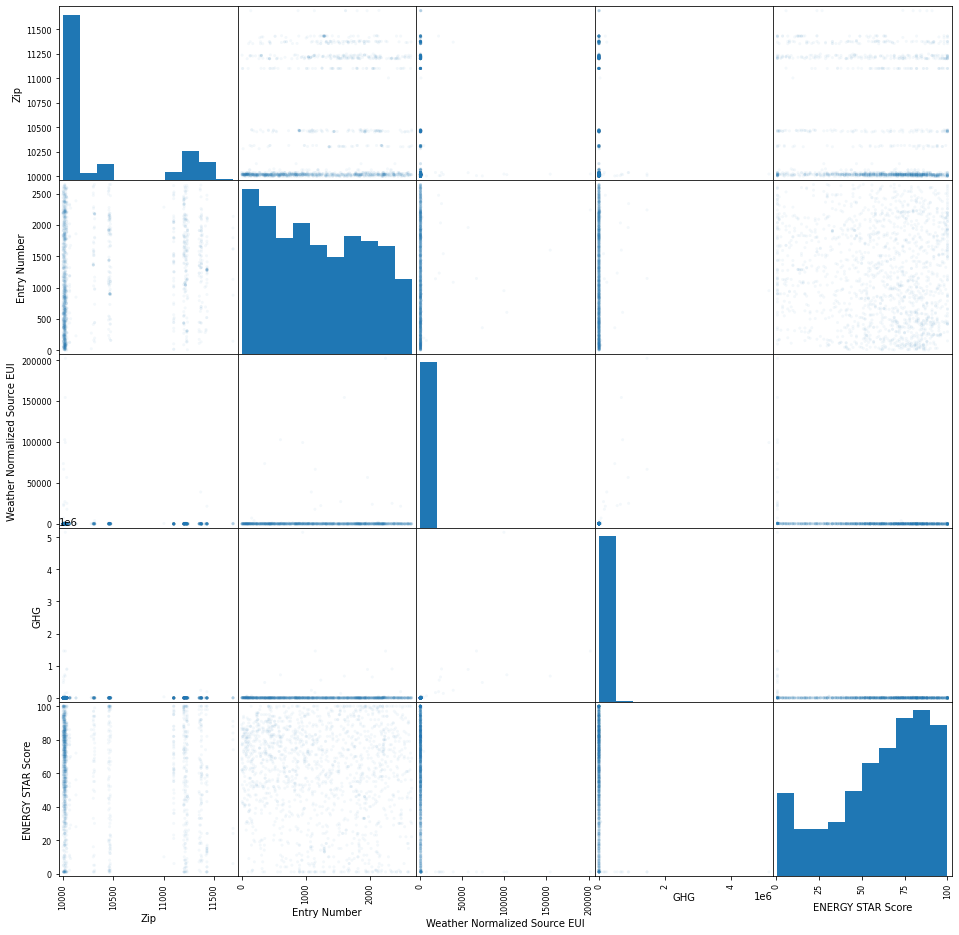

In [24]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.05, figsize=(16, 16))

In [25]:
df = df.drop(['Zip', 'Borough'], axis = 1)

In [26]:
df = pd.concat([df, ohc_borough], axis = 1)

In [27]:
df.shape

(1593, 9)

In [28]:
df.head()

,Entry Number,Weather Normalized Source EUI,GHG,ENERGY STAR Score,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
1,1518.0,437.4,12077.53,27.0,0,0,1,0,0
2,312.0,278.7,4817.62,61.0,0,0,1,0,0
3,52.0,306.6,10190.38,41.0,0,0,1,0,0
5,602.0,153.8,1846.50,76.0,0,0,1,0,0
6,48.0,252.1,3218.11,58.0,0,0,1,0,0


# Обучение

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [30]:
# тест
labels = df['ENERGY STAR Score']
data = df.drop(['ENERGY STAR Score'], axis=1)

In [45]:
feature_names = data.columns

In [31]:
labels.loc[labels < 70] = 0
labels.loc[labels >= 70] = 1

/Users/igor/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/igor/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [32]:
labels[:10]

1     0.0
2     0.0
3     0.0
5     1.0
6     0.0
7     0.0
9     1.0
10    0.0
12    1.0
17    1.0
Name: ENERGY STAR Score, dtype: float64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, 
                                                   test_size = 0.25,
                                                   random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1194, 8)
(399, 8)
(1194,)
(399,)


In [34]:
tree = DecisionTreeClassifier(min_samples_split=5,random_state = 17)

In [35]:
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.7719298245614035

In [52]:
predictions[:10]

array([1., 0., 0., 1., 0., 1., 1., 1., 0., 0.])

In [36]:
predictions = tree.predict(X_test)
metrics.accuracy_score(y_test, predictions)

0.7719298245614035

# Обучение случайного леса

In [37]:
from sklearn import ensemble


In [50]:
metric = []
num_of_sampels_splits = []


for i in range(2, 15):
    rf = ensemble.RandomForestClassifier(min_samples_split=i, random_state=11)
    rf.fit(X_train, y_train)
    prediction_rf = rf.predict(X_test)
    
    metric.append(metrics.accuracy_score(y_test, prediction_rf))
    num_of_sampels_splits.append(i)

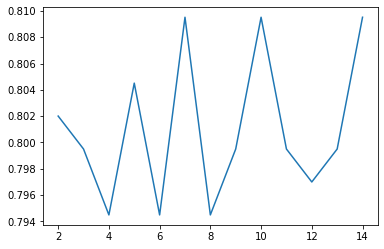

In [51]:
plt.plot(num_of_sampels_splits, metric)

# Отбор признаков с помощью алгоритма случайного леса

In [46]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print('Feature imprortances:')
for f, idx in enumerate(indices):
    print("{:2d}.feature '{:5s}' ({:.4f})".format(f+1, feature_names[idx], importances[idx]))

Feature imprortances:
 1.feature 'Weather Normalized Source EUI' (0.5363)
 2.feature 'GHG  ' (0.2155)
 3.feature 'Entry Number' (0.1919)
 4.feature 'MANHATTAN' (0.0227)
 5.feature 'QUEENS' (0.0164)
 6.feature 'BROOKLYN' (0.0067)
 7.feature 'BRONX' (0.0059)
 8.feature 'STATEN ISLAND' (0.0045)


(-1.0, 8.0)

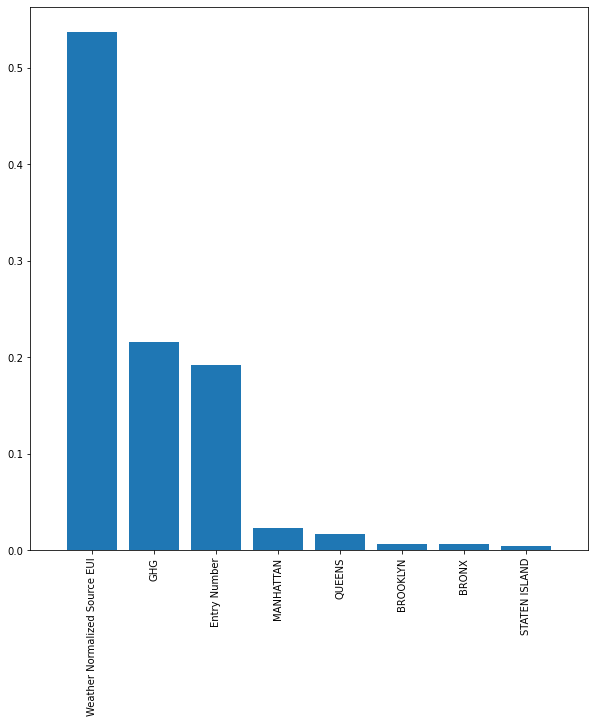

In [47]:
d_first = 8
plt.figure(figsize=(10,10))
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first])